In [5]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sb
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('StudentsPerformance.csv',error_bad_lines=False)
dataset.dtypes

/tmp/ipykernel_25966/2984986227.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataset = pd.read_csv('StudentsPerformance.csv',error_bad_lines=False)


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
dataset.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
dataset['math score'].mean()

66.089

/home/chetan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


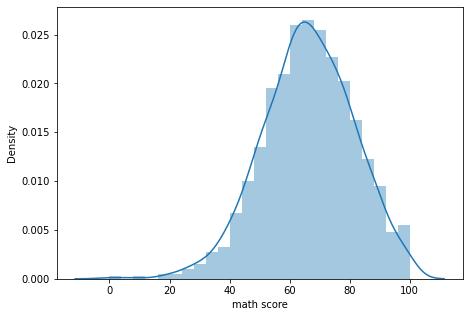

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(dataset['math score'])
plt.show()

/home/chetan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

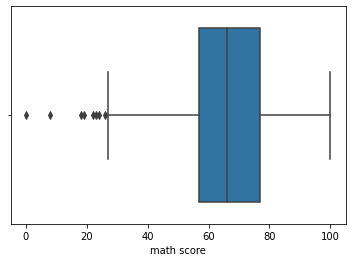

In [10]:
sb.boxplot(dataset['math score'])

In [12]:
Q1 = np.percentile(dataset['math score'], 25,interpolation = 'midpoint')
Q3 = np.percentile(dataset['math score'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

77.0
57.0
20.0


/tmp/ipykernel_25966/1714832441.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dataset['math score'], 25,interpolation = 'midpoint')
/tmp/ipykernel_25966/1714832441.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dataset['math score'], 75,interpolation = 'midpoint')


In [13]:
upper_limit = Q1 + 1.5 * IQR
lower_limit = Q3 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

87.0
47.0


In [14]:
dataset[dataset['math score'] > upper_limit]
dataset[dataset['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
11,male,group D,associate's degree,standard,none,40,52,43
17,female,group B,some high school,free/reduced,none,18,32,28
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
928,male,group E,associate's degree,free/reduced,completed,46,43,44
958,female,group D,high school,standard,none,45,63,59
980,female,group B,high school,free/reduced,none,8,24,23
986,female,group C,associate's degree,standard,none,40,59,51


In [18]:
new_dataset = dataset[dataset['math score'] < upper_limit]
new_dataset.shape
dataset['math score'].mean()
dataset.shape
new_dataset.shape

(905, 8)

/home/chetan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chetan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/chetan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for h

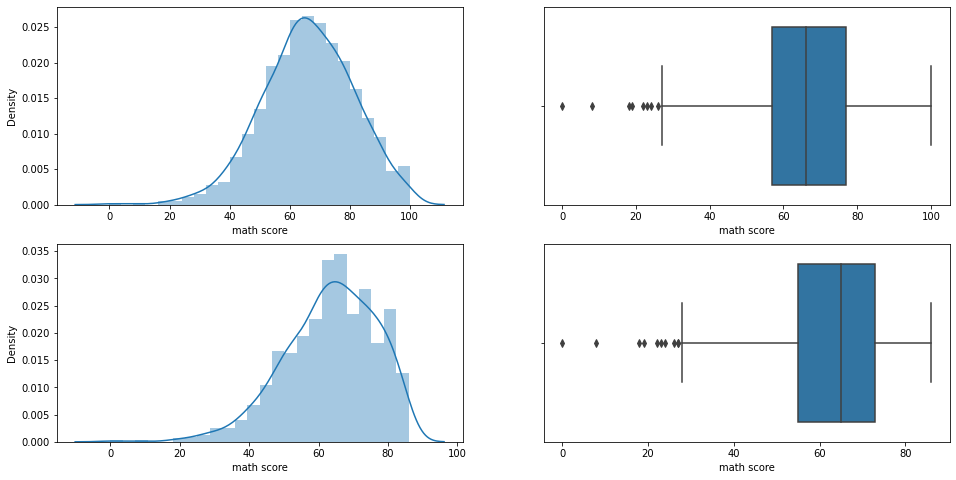

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sb.distplot(dataset['math score'])
plt.subplot(2,2,2)
sb.boxplot(dataset['math score'])
plt.subplot(2,2,3)
sb.distplot(new_dataset['math score'])
plt.subplot(2,2,4)
sb.boxplot(new_dataset['math score'])
plt.show()

In [29]:
dataset['math score'].shape

(1000,)

In [30]:
new_dataset['math score'].shape

(905,)